In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

In [ ]:
X, y = make_blobs(n_samples=200,
                  centers=3,
                  cluster_std=5.0,
                  n_features=2,
                  random_state=42)

In [ ]:
X.shape

(200, 2)

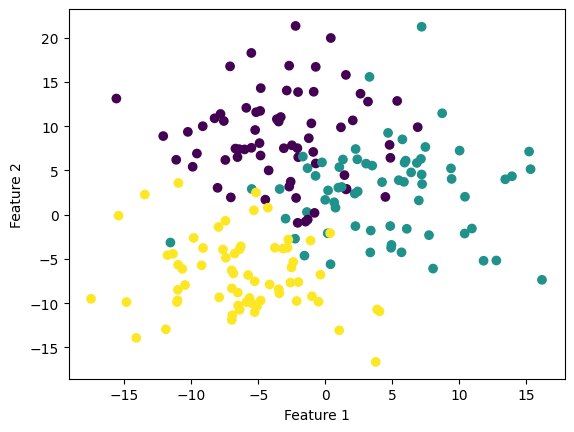

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

outliers

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model.predict(X)

In [ ]:
print(classification_report(y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8696    0.8955    0.8824        67
           1     0.8889    0.8358    0.8615        67
           2     0.9265    0.9545    0.9403        66

    accuracy                         0.8950       200
   macro avg     0.8950    0.8953    0.8947       200
weighted avg     0.8948    0.8950    0.8945       200



In [ ]:
accuracy_score(y, y_pred)

0.98

In [ ]:
# training - 80%, test - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(1.0, 0.875)

performanta mare pe train, performanta mica pe test => OVERFITTING (invatare pe de rost)

performanta mica pe train, performanta mica pe test => UNDERFITTING (nu invata)

In [ ]:
data = load_breast_cancer(as_frame=True)
df = data.data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.values
y = data.target.values

In [ ]:
y.sum(), (y == 0).sum()

(357, 212)

In [ ]:
y.sum() / y.shape[0], (y == 0).sum() / y.shape[0]

(0.6274165202108963, 0.37258347978910367)

In [ ]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.9406593406593406, 0.956140350877193)

In [ ]:
print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.8837    0.9383        43
           1     0.9342    1.0000    0.9660        71

    accuracy                         0.9561       114
   macro avg     0.9671    0.9419    0.9521       114
weighted avg     0.9590    0.9561    0.9555       114



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
tn, fp, fn, tp

(38, 5, 0, 71)

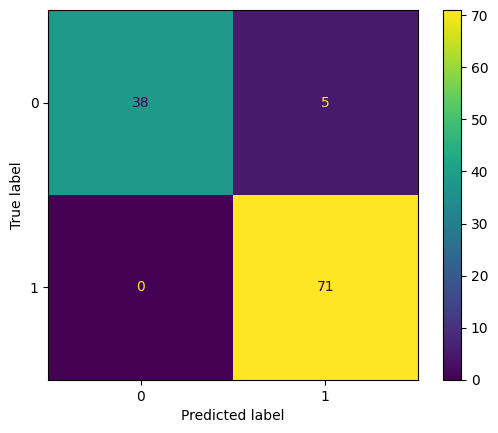

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[38,  5],
       [ 0, 71]])

In [ ]:
for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    print(f'k={k}, acc_train={acc_train}, acc_test={acc_test}')

k=1, acc_train=1.0, acc_test=0.9298245614035088
k=3, acc_train=1.0, acc_test=0.9385964912280702
k=5, acc_train=1.0, acc_test=0.956140350877193
k=7, acc_train=1.0, acc_test=0.9473684210526315
k=9, acc_train=1.0, acc_test=0.9473684210526315
k=11, acc_train=1.0, acc_test=0.9473684210526315
k=13, acc_train=1.0, acc_test=0.9736842105263158
k=15, acc_train=1.0, acc_test=0.9649122807017544
k=17, acc_train=1.0, acc_test=0.9649122807017544
k=19, acc_train=1.0, acc_test=0.9649122807017544
k=21, acc_train=1.0, acc_test=0.9649122807017544
k=23, acc_train=1.0, acc_test=0.9649122807017544
k=25, acc_train=1.0, acc_test=0.9649122807017544
k=27, acc_train=1.0, acc_test=0.956140350877193
k=29, acc_train=1.0, acc_test=0.9473684210526315
k=31, acc_train=1.0, acc_test=0.9473684210526315
k=33, acc_train=1.0, acc_test=0.9473684210526315
k=35, acc_train=1.0, acc_test=0.9473684210526315
k=37, acc_train=1.0, acc_test=0.9473684210526315
k=39, acc_train=1.0, acc_test=0.9473684210526315
k=41, acc_train=1.0, acc_te